[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/KrishnaRohithVemulapalli/Linear-Regression/blob/main/Student%20Performance/Student_performance.ipynb)

In [118]:
import pandas as pd


In [119]:
df = pd.read_csv('https://raw.githubusercontent.com/KrishnaRohithVemulapalli/DataSets/main/Student_Performance.csv')

In [120]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [121]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [122]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [124]:
df.shape

(10000, 6)

In [125]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [126]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [127]:
df.duplicated().sum()

127

In [128]:
df.drop_duplicates(inplace=True)

In [129]:
df.shape

(9873, 6)

In [130]:
# data=df.drop(columns='Extracurricular Activities')
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df['Extracurricular Activities'] = l.fit_transform(df['Extracurricular Activities'])

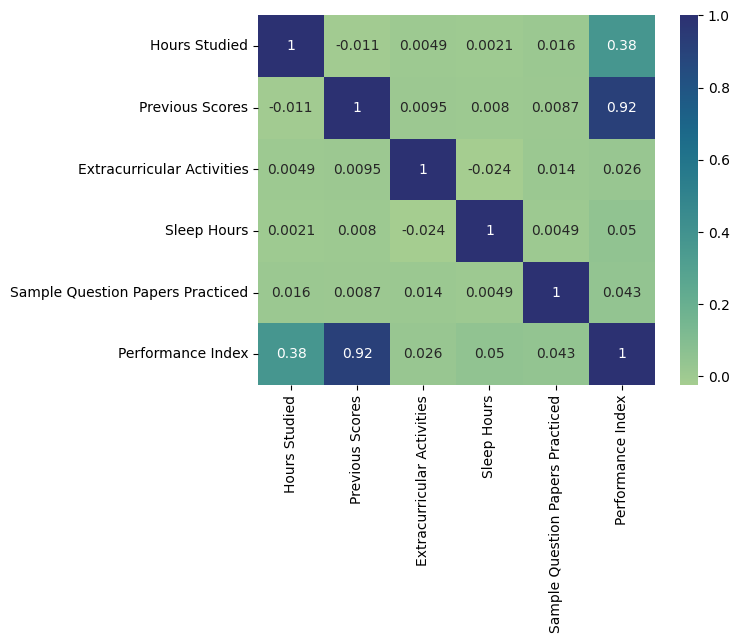

In [131]:
sns.heatmap(df.corr(),annot=True,cmap='crest')
plt.show()

In [132]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.004899,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.009534,0.007975,0.008719,0.915135
Extracurricular Activities,0.004899,0.009534,1.000000,-0.024008,0.013839,0.026075
Sleep Hours,0.002131,0.007975,-0.024008,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.013839,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.026075,0.050352,0.043436,1.000000


In [133]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(df.iloc[:,[0,1,5]])
# df=scaler.transform(df.iloc[:,[0,1,5]])

In [134]:
# df=pd.DataFrame(df)

In [135]:
# df.head()

In [136]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [137]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=62)

In [138]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [139]:
y_pred=reg.predict(X_test)

In [140]:
r2Score = r2_score(y_test,y_pred)
print('r2 Score = ',round(r2Score,4)*100)
mae_score = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error = ',round(mae_score,4))
rmse_score = np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error = ',round(rmse_score,4))

r2 Score =  98.9
Mean Absolute Error =  1.5919
Root Mean Squared Error =  2.0209


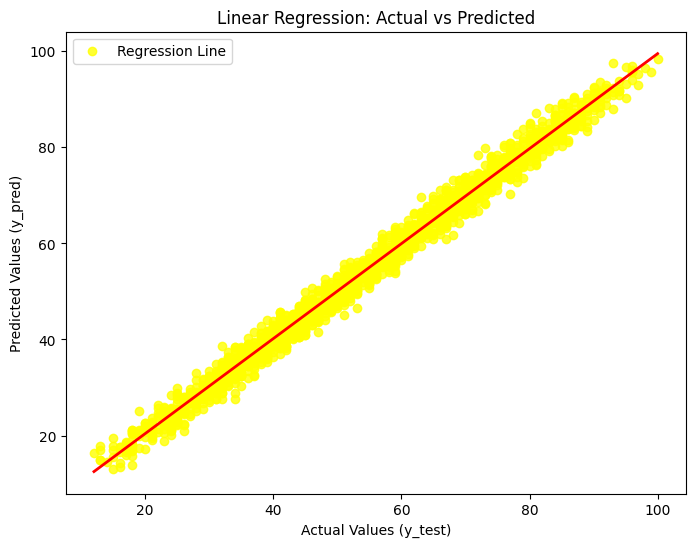

In [143]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'yellow'}, line_kws={'color': 'red', 'linewidth': 2})

# Add labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend(['Regression Line'], loc='best')

# Show the plot
plt.show()